# Merian Part 4: Explore your own sample

The goal of this notebook is to help you start with your own sample and explore the galaxy properties using the tools and knowledge you learned from this course.

**Prerequisites**
- Finished the Photometric Redshift notebook and Merian Part 1, 2, 3 notebooks

**Prerequisites**
- Need to install `reproject, photutils, cmasher, sep, statmorph`

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.io import fits
from IPython.display import clear_output

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 90
plt.rcParams['axes.linewidth'] = 2

In [2]:
required_packages = ['statmorph', 'photutils', 'sep', 'cmasher', 'reproject']  # Define the required packages for this notebook

import sys
import subprocess

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Download utils.py
    !wget -q -O /content/utils.py https://raw.githubusercontent.com/AstroJacobLi/ObsAstGreene/refs/heads/main/book/docs/utils.py
    # Function to check and install missing packages
    def install_packages(packages):
        for package in packages:
            try:
                __import__(package)
            except ImportError:
                print(f"Installing {package}...")
                subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
    # Install any missing packages
    install_packages(required_packages)
else:
    # If not in Colab, adjust the path for local development
    sys.path.append('/Users/jiaxuanl/Dropbox/Courses/ObsAstGreene/book/docs/')

# Get the directory right
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive/')
  os.chdir('/content/drive/Shareddrives/AST207/data')
else:
    os.chdir('../../_static/ObsAstroData/')

## 1. Define your own Merian sample

Let's load the in-band galaxy catalog and show the galaxy properties in this sample. Recall that you've already obtained the sizes of all galaxies in this catalog by doing Sersic fitting (Merian notebook 2)!

In [5]:
cat_inband = Table.read('./merian/cosmos_Merian_DR1_specz_inband.fits')
print('Total number of galaxies:', len(cat_inband))

Total number of galaxies: 152


Dsepite the fact that the catalog provides an estimate for the stellar mass, let's calculate it in another way. For a given galaxy, we know its magnitudes in both `g` and `i` bands, and thus we can calculate its **luminosity** in g-band:
$$
L_g / L_\odot = 10^{-0.4 \times (M_g - M_{g, \odot})},
$$
where $M_{g,\odot}=5.05$ is the absolute magnitude of the Sun in $g$-band.

To convert the luminosity to stellar mass, we need a so-called "mass-to-light ratio", which is a function of $g-i$ color (from [Into et al. 2013](https://ui.adsabs.harvard.edu/abs/2013MNRAS.430.2715I/abstract)):
$$
\log M_\star / L_g = 1.297 (g-i) - 0.855
$$

**Exercise 1**

1. Based on the above information, write a Python function to calculate the log(stellar mass) of a given galaxy. The function should look like:
```python
from astropy.cosmology import Planck18
import astropy.units as u
def calc_logMstar(mag_g, mag_i, spec_z):
    distance = Planck18.luminosity_distance(spec_z).to(u.Mpc).value # distance in Mpc
    M_g = mag_g - (5 * np.log10(distance) + 25) # absolute magnitude in g-band
    g_i_color = mag_g - mag_i

    ## Complete this function from here!

    return logMstar
```

2. Use this function to calculate the stellar mass of all galaxies in `cat_inband`, and write the calculated stellar masses to the catalog like `cat_inband['logMstar'] = calc_logMstar(cat_inband['mag_g'], cat_inband['mag_i'], cat_inband['z_desi'])`. Then compare your stellar mass with `cat_inband['mass_1p0']`. Do they agree? Don't worry if your stellar mass is a bit higher than `mass_1p0`!

In [14]:
from astropy.cosmology import Planck18
import astropy.units as u
def calc_logMstar(mag_g, mag_i, spec_z):
    distance = Planck18.luminosity_distance(spec_z).to(u.Mpc).value # distance in Mpc
    M_g = mag_g - (5 * np.log10(distance) + 25) # absolute magnitude in g-band
    g_i_color = mag_g - mag_i
    log_L = -0.4 * (M_g - 5.05)
    log_ML = 1.297 * g_i_color - 0.855
    logMstar = log_ML + log_L
    return logMstar

Text(0.5, 0, 'i-N708')

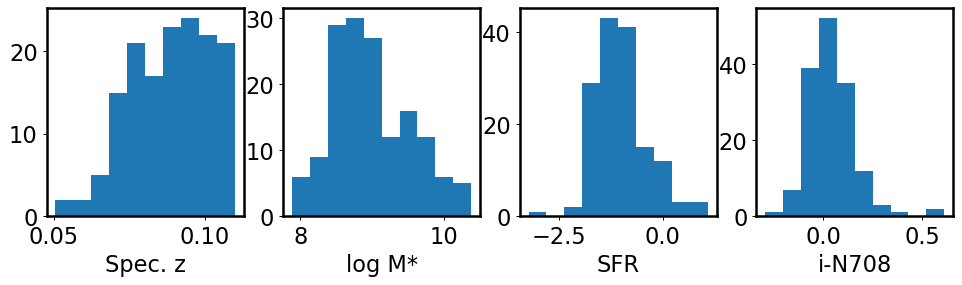

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
plt.sca(axes[0])
plt.hist(cat_inband['z_desi'])
plt.xlabel('Spec. z')

plt.sca(axes[1])
plt.hist(cat_inband['logMstar'])
plt.xlabel('log M*')

plt.sca(axes[2])
plt.hist(cat_inband['sfr_1p0'])
plt.xlabel('SFR')

plt.sca(axes[3])
plt.hist(cat_inband['mag_i'] - cat_inband['mag_N708'])
plt.xlabel('i-N708')

**Exercise 2**

Select your own sample!! For example, you can select the most massive things, the most star-forming things, the largest things, etc.

## 2. A closer look at your sample
Note that the following questions are very open-ended, and they don't need to be answered exactly in the way we ask for. You should treat this notebook as "doing research". 

**Exercise 3**

1. Show the distribution of your subsample on the mass-SFR plane or on the mass-size plane. Please also show the whole sample in the background. When plotting these relations, please use `log10(stellar mass)`, `log10(SFR)`, and `log10(size)`. Note that the size should be in physical units (e.g., kpc) instead of arcsec.

2. Discuss why your subsample would look like this, and come up with a hypothesis.

3. Fit a model to the properties of your subsample and compare your fit with the full sample. Do you see any differences? Why?

4. You can also generate a bunch of H-alpha maps for galaxies in your subsample. State what you find. 

**Exercise 4 (not tested yet):**

Let's measure the asymmetry and concentration of the H-alpha map!

In [ ]:
img_ha = cutouts_matched_reproj['ha']
img = cutouts_reproj['z']

In [ ]:
import sep
img = np.array(img).astype(img.dtype.newbyteorder('='))
bkg = sep.Background(img, bw=128, bh=128) # this makes the background model
# We extract sources above 4-sigma
_, segmap = sep.extract(img, 4, err=bkg.rms(), deblend_cont=0.005, segmentation_map=True)
# we only keep the footprint of the target galaxy 
ind = segmap[img.shape[1]//2, img.shape[0]//2]
obj_segmap = segmap.copy()
obj_segmap[obj_segmap != ind] = 0

# We construct a mask based on the original segmap. The mask blocks out
segmap[segmap == ind] = 0
mask = (segmap > 0)
from astropy.convolution import convolve_fft, Gaussian2DKernel
mask = convolve_fft(mask, Gaussian2DKernel(3))
mask = mask > 1e-2
show_image(img * ~mask, figsize=(4, 4), percl=99.5)

In [ ]:
import statmorph
source_morphs = statmorph.source_morphology(
  img_ha, obj_segmap, weightmap=bkg.rms(), psf=psf, mask=mask)
morph = source_morphs[0]

from statmorph.utils.image_diagnostics import make_figure
fig = make_figure(morph)